In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import ascent

 ## Image 

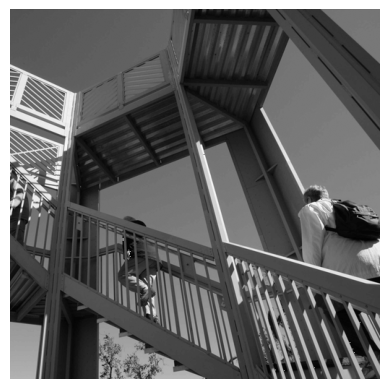

In [39]:
img=ascent()
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(img)
plt.show()

## image size

In [40]:
print(img.shape)
print(img)
img=img/255.0

(512, 512)
[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]


## filter 

In [41]:
# filter=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

filter = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
# filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
print(filter)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


## output size 

In [42]:
prev_n_h=img.shape[0]
prev_n_w=img.shape[1]
s=1 #stride
f=filter.shape[0]
n_h=int((prev_n_h-f)/s)+1
n_w=int((prev_n_w-f)/s)+1
print(n_h)
print(n_w)
# print(f)
# print(pre_n_h)
# print(pre_n_w)
# print(s)

510
510


## Convolution

(510, 510)


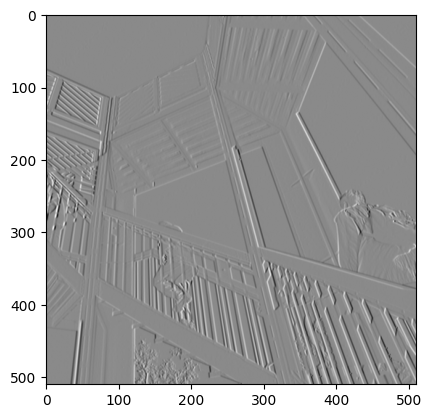

In [43]:
Z=np.zeros((n_h,n_w))
for h in range(n_h):
    vert_start=s*h
    vert_end=vert_start+f
    for w in range(n_w):
        horiz_start=s*w
        horiz_end=horiz_start+f
        window=img[vert_start:vert_end,horiz_start:horiz_end]
        window=window*filter
        Z[h,w]=np.sum(window)
       
Z=Z/Z.max()
print(Z.shape)
plt.gray()
plt.grid(False)
plt.imshow(Z)
plt.show()

## max pooling 

255
255
(255, 255)


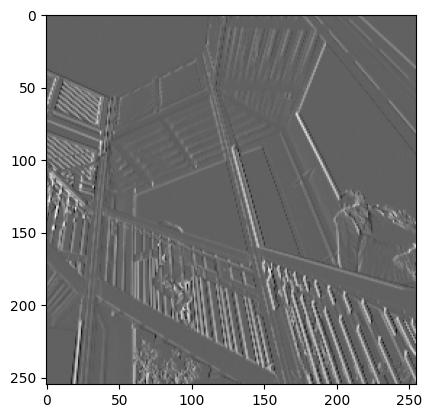

In [46]:
#pooling size (2,2) f=2,s=2

new_n_h = (n_h - f_max) // s_max + 1
new_n_w = (n_w - f_max) // s_max + 1
print(new_n_h)
print(new_n_w)
s_max=2
f_max=2
Z_max=np.zeros((new_n_h,new_n_w))
for h in range(new_n_h):
    vert_start=s_max*h
    vert_end=vert_start+f_max
    for w in range(new_n_w):
        horiz_start=s_max*w
        horiz_end=horiz_start+f_max
        window_max=Z[vert_start:vert_end,horiz_start:horiz_end]
        Z_max[h,w]=np.max(window_max)



print(Z_max.shape)
plt.gray()
plt.grid(False)
plt.imshow(Z_max)
plt.show()        